# Importing Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Obtaining data from past seasons

## Scraping stats

In [2]:
# list of seasons to consider
year_list = ['20012002', '20022003', '20032004', '20042005', '20052006', '20062007', '20072008', '20082009', '20092010', '20102011', '20112012', '20122013', '20132014', '20142015', '20152016', '20162017', '20172018', '20182019', '20192020', '20202021']

In [3]:
# list with some stats
team_stats = []

# obtain some stats using an NHL API
for season in tqdm(year_list):
    res = requests.get("https://statsapi.web.nhl.com/api/v1/standings?season={}".format(season))
    for division in res.json()['records']:
        for team in division['teamRecords']:
            team_stats.append({'season': season,
                               'team_id': team['team']['id'],
                               'gamesplayed': team['gamesPlayed'],
                               'points': team["points"],
                               'rank':team['leagueRank']})

# create a team id list for getting more stats
team_id_list = set([team['team_id'] for team in team_stats])

  0%|          | 0/20 [00:00<?, ?it/s]

In [4]:
# list with more stats
team_stats_2 = []

# obtaine more stats using an NHL API
for team in tqdm(team_id_list):
    for season in year_list:
        res2 = requests.get("https://statsapi.web.nhl.com/api/v1/teams/{}/stats?season={}".format(team, season))
        try:
            team_stats_2.append({'season': season,
                                 'team_id': res2.json()['stats'][0]['splits'][0]['team']['id'],
                                 'team_name': res2.json()['stats'][0]['splits'][0]['team']['name'],
                                 'gamesplayed': res2.json()['stats'][0]['splits'][0]['stat']['gamesPlayed'],
                                 'goals_against_per_game': res2.json()['stats'][0]['splits'][0]['stat']["goalsAgainstPerGame"],
                                 'goals_scored_per_game': res2.json()['stats'][0]['splits'][0]['stat']["goalsPerGame"],
                                 'power_play_goals': res2.json()['stats'][0]['splits'][0]['stat']['powerPlayGoals'],
                                 'power_play_goals_against': res2.json()['stats'][0]['splits'][0]['stat']['powerPlayGoalsAgainst'],
                                 'power_play_opportunities': res2.json()['stats'][0]['splits'][0]['stat']['powerPlayOpportunities'],
                                 'shots_per_game': res2.json()['stats'][0]['splits'][0]['stat']['shotsPerGame'],
                                 'shots_allowed_per_game': res2.json()['stats'][0]['splits'][0]['stat']['shotsAllowed']})
        except:
            pass

  0%|          | 0/33 [00:00<?, ?it/s]

In [5]:
# create dataframe with some stats
df = pd.DataFrame(team_stats_2)
df

,season,team_id,team_name,gamesplayed,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,power_play_opportunities,shots_per_game,shots_allowed_per_game
0,20012002,1,New Jersey Devils,82,2.280,2.500,44.0,43.0,261.0,29.8171,23.1707
1,20022003,1,New Jersey Devils,82,2.024,2.634,36.0,32.0,303.0,31.7195,23.5732
2,20032004,1,New Jersey Devils,82,2.000,2.598,51.0,39.0,312.0,29.6707,24.4024
3,20052006,1,New Jersey Devils,82,2.744,2.841,78.0,63.0,439.0,29.2073,29.3049
4,20062007,1,New Jersey Devils,82,2.354,2.512,65.0,40.0,367.0,28.7073,28.4390
...,...,...,...,...,...,...,...,...,...,...,...
569,20202021,53,Arizona Coyotes,56,3.107,2.679,37.0,32.0,178.0,27.4643,30.4643
570,20172018,54,Vegas Golden Knights,82,2.744,3.268,52.0,44.0,248.0,32.7561,30.7439
571,20182019,54,Vegas Golden Knights,82,2.780,3.000,39.0,44.0,232.0,34.3171,29.2561
572,20192020,54,Vegas Golden Knights,71,2.944,3.155,42.0,50.0,191.0,34.5070,29.3239


In [6]:
# create other dataframe with more stats
df2 = pd.DataFrame(team_stats)
df2

,season,team_id,gamesplayed,points,rank
0,20012002,4,82,97,7
1,20012002,2,82,96,8
2,20012002,1,82,95,10
3,20012002,3,82,80,21
4,20012002,5,82,69,26
...,...,...,...,...,...
569,20202021,52,56,63,14
570,20202021,8,56,59,18
571,20202021,20,56,55,20
572,20202021,9,56,51,23


In [7]:
df.shape

(574, 11)

In [8]:
df2.shape

(574, 5)

## Converting total stats into stats per game

In [9]:
df['power_play_goals'] = df['power_play_goals'] / df['gamesplayed']
df['power_play_goals_against'] = df['power_play_goals_against'] / df['gamesplayed']
df['power_play_opportunities'] = df['power_play_opportunities'] / df['gamesplayed']
df2['points'] = df2['points'] / df2['gamesplayed']

In [10]:
df.head()

,season,team_id,team_name,gamesplayed,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,power_play_opportunities,shots_per_game,shots_allowed_per_game
0,20012002,1,New Jersey Devils,82,2.280,2.500,0.536585,0.524390,3.182927,29.8171,23.1707
1,20022003,1,New Jersey Devils,82,2.024,2.634,0.439024,0.390244,3.695122,31.7195,23.5732
2,20032004,1,New Jersey Devils,82,2.000,2.598,0.621951,0.475610,3.804878,29.6707,24.4024
3,20052006,1,New Jersey Devils,82,2.744,2.841,0.951220,0.768293,5.353659,29.2073,29.3049
4,20062007,1,New Jersey Devils,82,2.354,2.512,0.792683,0.487805,4.475610,28.7073,28.4390


## Merging stats dataframes

In [11]:
df_t = pd.merge(left=df, right=df2, how='left', left_on=['season', "team_id"], right_on=['season','team_id'])


In [12]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 573
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season                    574 non-null    object 
 1   team_id                   574 non-null    int64  
 2   team_name                 574 non-null    object 
 3   gamesplayed_x             574 non-null    int64  
 4   goals_against_per_game    574 non-null    float64
 5   goals_scored_per_game     574 non-null    float64
 6   power_play_goals          574 non-null    float64
 7   power_play_goals_against  574 non-null    float64
 8   power_play_opportunities  574 non-null    float64
 9   shots_per_game            574 non-null    float64
 10  shots_allowed_per_game    574 non-null    float64
 11  gamesplayed_y             574 non-null    int64  
 12  points                    574 non-null    float64
 13  rank                      574 non-null    object 
dtypes: float64

In [13]:
df_t.head()

,season,team_id,team_name,gamesplayed_x,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,power_play_opportunities,shots_per_game,shots_allowed_per_game,gamesplayed_y,points,rank
0,20012002,1,New Jersey Devils,82,2.280,2.500,0.536585,0.524390,3.182927,29.8171,23.1707,82,1.158537,10
1,20022003,1,New Jersey Devils,82,2.024,2.634,0.439024,0.390244,3.695122,31.7195,23.5732,82,1.317073,4
2,20032004,1,New Jersey Devils,82,2.000,2.598,0.621951,0.475610,3.804878,29.6707,24.4024,82,1.219512,9
3,20052006,1,New Jersey Devils,82,2.744,2.841,0.951220,0.768293,5.353659,29.2073,29.3049,82,1.231707,8
4,20062007,1,New Jersey Devils,82,2.354,2.512,0.792683,0.487805,4.475610,28.7073,28.4390,82,1.304878,7


In [14]:
df_t

,season,team_id,team_name,gamesplayed_x,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,power_play_opportunities,shots_per_game,shots_allowed_per_game,gamesplayed_y,points,rank
0,20012002,1,New Jersey Devils,82,2.280,2.500,0.536585,0.524390,3.182927,29.8171,23.1707,82,1.158537,10
1,20022003,1,New Jersey Devils,82,2.024,2.634,0.439024,0.390244,3.695122,31.7195,23.5732,82,1.317073,4
2,20032004,1,New Jersey Devils,82,2.000,2.598,0.621951,0.475610,3.804878,29.6707,24.4024,82,1.219512,9
3,20052006,1,New Jersey Devils,82,2.744,2.841,0.951220,0.768293,5.353659,29.2073,29.3049,82,1.231707,8
4,20062007,1,New Jersey Devils,82,2.354,2.512,0.792683,0.487805,4.475610,28.7073,28.4390,82,1.304878,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,20202021,53,Arizona Coyotes,56,3.107,2.679,0.660714,0.571429,3.178571,27.4643,30.4643,56,0.964286,22
570,20172018,54,Vegas Golden Knights,82,2.744,3.268,0.634146,0.536585,3.024390,32.7561,30.7439,82,1.329268,5
571,20182019,54,Vegas Golden Knights,82,2.780,3.000,0.475610,0.536585,2.829268,34.3171,29.2561,82,1.134146,16
572,20192020,54,Vegas Golden Knights,71,2.944,3.155,0.591549,0.704225,2.690141,34.5070,29.3239,71,1.211268,8


# Exploratory Data Analysis - *EDA*

## Dealing with nulls

In [15]:
df_t.isna().sum()

season                      0
team_id                     0
team_name                   0
gamesplayed_x               0
goals_against_per_game      0
goals_scored_per_game       0
power_play_goals            0
power_play_goals_against    0
power_play_opportunities    0
shots_per_game              0
shots_allowed_per_game      0
gamesplayed_y               0
points                      0
rank                        0
dtype: int64

**No nulls in my data.**

## Finding Correlations

### Visualisation

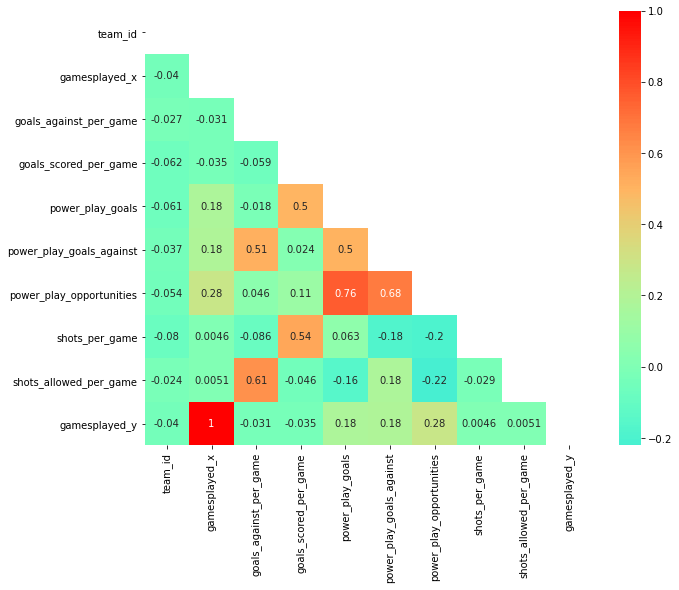

In [16]:
mask = np.zeros_like(df_t.drop('points', axis=1).corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize = (10, 8))
sns.heatmap(df_t.drop('points', axis=1).corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='rainbow')
plt.show();

### Dropping correlated columns

In [18]:
df_t = df_t.drop(['power_play_opportunities'], axis = 1)

## Selecting relevant features for my modeling

In [19]:
# after trying dropping and leaving different features, the best results where obtained dropping these columns
df_clean = df_t.drop(['season', 'team_id', 'team_name', 'gamesplayed_x', 'gamesplayed_y', 'rank',], axis=1)

In [20]:
df_clean.shape

(574, 7)

# Preparing data for modeling 

In [21]:
# import libraries for modeling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

## Split data into dependent and independent variables 

In [22]:
X = df_clean.drop('points', axis=1)
y = df_clean['points']

## Scaling 

### Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X)

X_std = pd.DataFrame(X_std, columns = X.columns)

### Normalizer

In [24]:
from sklearn.preprocessing import Normalizer

nor_scaler = Normalizer()

X_nor = nor_scaler.fit_transform(X)

X_nor = pd.DataFrame(X_nor, columns = X.columns)

### MinMax Scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_minmax = nor_scaler.fit_transform(X)

X_minmax = pd.DataFrame(X_minmax, columns = X.columns)

After trying three diferent scalers, I've reached the conclusion that none of them really have a significant positive impact on my models.  
The reason of that is because the data is already scaled by the number of games played, so I finally decided not to apply any of these scalers.

### Train - Test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state=40)

# Modeling

## Model 1 - Linear Model

### Defining Linear Model

In [27]:
lm = linear_model.LinearRegression()

### Fitting model to train data

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluating Model 1

### Predicting the response for test data

In [29]:
y_pred = lm.predict(X_test)

### Obtaining the accuracy of the prediction

In [30]:
# obtain the mean squared error
mse_lm = mean_squared_error(y_test, y_pred)
print('Without scaling and droping just some columns - MSE:',mse_lm)

Without scaling and droping just some columns - MSE: 0.003788058931079905


In [31]:
# obtain the root mean squared error
import math 
rmse_lm = math.sqrt(mse_lm)
print('Without scaling and droping just some columns - RMSE:',rmse_lm)

Without scaling and droping just some columns - RMSE: 0.06154720896255089


In [32]:
# obtain the R2 Score
r2_lm = r2_score(y_test, y_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_lm)

Without scaling and droping just some columns - R2 Score: 0.863141562403677


## Model 2 - Decision Tree

In [33]:
# importing library
from sklearn.tree import DecisionTreeRegressor

### Defining Decision Tree Model

In [34]:
dt=DecisionTreeRegressor(random_state=40)

### Fitting the model to train data

In [35]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=40)

## Evaluating Model 2

### Predicting the response for test data

In [36]:
dt_pred = dt.predict(X_test)

### Obtaining the accuracy of the prediction

In [37]:
# obtain the mean squared error
mse_dt = mean_squared_error(y_test, dt_pred)
print('Without scaling and droping just some columns - MSE:',mse_dt)

Without scaling and droping just some columns - MSE: 0.008345498731961975


In [38]:
# obtain the root mean squared error
import math 
rmse_dt = math.sqrt(mse_dt)
print('Without scaling and droping just some columns - RMSE:',rmse_dt)

Without scaling and droping just some columns - RMSE: 0.09135370124938548


In [39]:
# obtain the R2 Score
r2_dt = r2_score(y_test, dt_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_dt)

Without scaling and droping just some columns - R2 Score: 0.6984862331344976


## Model 3 - Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

### Defining Random Forest Model

In [41]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)

### Fitting model to train data

In [42]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

## Evaluating Model 3

### Predicting the response for test data

In [43]:
rf_pred = rf.predict(X_test)

### Obtaining de accuracy of the prediction

In [44]:
# obtain the mean squared error
mse_rf = mean_squared_error(y_test, rf_pred)
print('Without scaling and droping just some columns - MSE:',mse_rf)

Without scaling and droping just some columns - MSE: 0.004839552555029635


In [45]:
# obtain the root mean squared error
import math 
rmse_rf = math.sqrt(mse_rf)
print('Without scaling and droping just some columns - RMSE:',rmse_rf)

Without scaling and droping just some columns - RMSE: 0.06956689266475566


In [46]:
# obtain the R2 Score
r2_rf = r2_score(y_test, rf_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_rf)

Without scaling and droping just some columns - R2 Score: 0.8251522446199564


## Model 4 - Stacked Best Of Model - lm, dt, rf

In [47]:
from sklearn.ensemble import StackingRegressor 

### Defining Stacked Best Of Model

In [48]:
estimators_simple=[('lm',linear_model.LinearRegression()),
                   ('dt',DecisionTreeRegressor(random_state=40)),
                   ('rf', RandomForestRegressor(n_estimators=20, random_state=0))]
regr_stack_simple1=StackingRegressor(estimators=estimators_simple)

### Fitting the model to train data

In [49]:
regr_stack_simple1.fit(X_train,y_train)

StackingRegressor(estimators=[('lm', LinearRegression()),
                              ('dt', DecisionTreeRegressor(random_state=40)),
                              ('rf',
                               RandomForestRegressor(n_estimators=20,
                                                     random_state=0))])

## Evaluating Model 4

### Predicting the response for test data

In [50]:
best1_pred = regr_stack_simple1.predict(X_test)

### Obtaining the accuracy of the prediction

In [51]:
# obtain the mean squared error
mse_best1 = mean_squared_error(y_test, best1_pred)
print('Without scaling and droping just some columns - MSE:',mse_best1)

Without scaling and droping just some columns - MSE: 0.0038090074340855194


In [52]:
# obtain the root mean squared error
import math 
rmse_best1 = math.sqrt(mse_best1)
print('Without scaling and droping just some columns - RMSE:',rmse_best1)

Without scaling and droping just some columns - RMSE: 0.061717156723924985


In [53]:
# obtain the R2 Score
r2_best1 = r2_score(y_test, best1_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_best1)

Without scaling and droping just some columns - R2 Score: 0.8623847158383273


## Model 5 - Stacked Best Of Model - lm, rf

In [54]:
from sklearn.ensemble import StackingRegressor 

### Defining Stacked Best Of Model

In [55]:
estimators_simple=[('lm',linear_model.LinearRegression()),
                  ('rf', RandomForestRegressor(n_estimators=20, random_state=0))]
regr_stack_simple2=StackingRegressor(estimators=estimators_simple)

### Fitting the model to train data

In [56]:
regr_stack_simple2.fit(X_train,y_train)

StackingRegressor(estimators=[('lm', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(n_estimators=20,
                                                     random_state=0))])

## Evaluating Model 5

### Predicting the response for test data

In [57]:
best2_pred = regr_stack_simple2.predict(X_test)

### Obtaining the accuracy of the prediction

In [58]:
# obtain the mean squared error
mse_best2 = mean_squared_error(y_test, best2_pred)
print('Without scaling and droping just some columns - MSE:',mse_best2)

Without scaling and droping just some columns - MSE: 0.003806298808004019


In [59]:
# obtain the root mean squared error
import math 
rmse_best2 = math.sqrt(mse_best2)
print('Without scaling and droping just some columns - RMSE:',rmse_best2)

Without scaling and droping just some columns - RMSE: 0.061695208955023555


In [60]:
# obtain the R2 Score
r2_best2 = r2_score(y_test, best2_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_best2)

Without scaling and droping just some columns - R2 Score: 0.8624825755443908


In [61]:
print('lm:',r2_lm, rmse_lm, mse_lm)
print('best1:',r2_best1, rmse_best1, mse_best1)
print('best:',r2_best2, rmse_best2, mse_best2)
print('dt:',r2_dt, rmse_dt, mse_dt)
print('rf:',r2_rf,rmse_rf, mse_rf)

lm: 0.863141562403677 0.06154720896255089 0.003788058931079905
best1: 0.8623847158383273 0.061717156723924985 0.0038090074340855194
best: 0.8624825755443908 0.061695208955023555 0.003806298808004019
dt: 0.6984862331344976 0.09135370124938548 0.008345498731961975
rf: 0.8251522446199564 0.06956689266475566 0.004839552555029635


## Comparing Models

In [62]:
import bcolors
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [87]:
print(bcolors.WARNING + 'lm:','R2:', r2_lm, 'RMSE:', rmse_lm, 'MSE:', mse_lm, bcolors.ENDC)
print('best1:', 'R2:',r2_best1 ,'RMSE:',  rmse_best1 , 'MSE:', mse_best1)
print('best2:','R2:',r2_best2,'RMSE:',  rmse_best2,'MSE:', mse_best2)
print('dt:','R2:',r2_dt,'RMSE:',  rmse_dt,'MSE:', mse_dt)
print('rf:','R2:',r2_rf, 'RMSE:', rmse_rf,'MSE:', mse_rf)

lm: R2: 0.863141562403677 RMSE: 0.06154720896255089 MSE: 0.003788058931079905 
best1: R2: 0.8623847158383273 RMSE: 0.061717156723924985 MSE: 0.0038090074340855194
best2: R2: 0.8624825755443908 RMSE: 0.061695208955023555 MSE: 0.003806298808004019
dt: R2: 0.6984862331344976 RMSE: 0.09135370124938548 MSE: 0.008345498731961975
rf: R2: 0.8251522446199564 RMSE: 0.06956689266475566 MSE: 0.004839552555029635


After trying different models, I came into the conlusion that the one with which I obtained the best results was Linear Model.  
Applying this model, the MSE of my predictions is just about 0.0038, which means that my predictions are wrong just by approximately 0.3 points per season.  
These results are quite good as during the season a team can obtain up to 164 points (2 points per game played). 

### Obtaining data from this season and processing it as done with data from past seasons

In [64]:
# list with some stats
team_stats_now = []

# obtain some stats using an NHL API
res3 = requests.get("https://statsapi.web.nhl.com/api/v1/standings?season=20212022")
for division in res3.json()['records']:
    for team in division['teamRecords']:
        team_stats_now.append({'season': season,
                           'team_id': team['team']['id'],
                           'gamesplayed': team['gamesPlayed'],
                           'points': team["points"],
                           'rank':team['leagueRank']})

In [65]:
# list with more stats
team_stats_2_now = []

# obtain some stats using an NHL API
team_id_list.add(55) # need to add a new team that has joined to the league this season
for team in tqdm(team_id_list):
    res4 = requests.get("https://statsapi.web.nhl.com/api/v1/teams/{}/stats".format(team))
    try:
        team_stats_2_now.append({'team_id': res4.json()['stats'][0]['splits'][0]['team']['id'],
                             'team_name': res4.json()['stats'][0]['splits'][0]['team']['name'],
                             'gamesplayed': res4.json()['stats'][0]['splits'][0]['stat']['gamesPlayed'],
                             'goals_against_per_game': res4.json()['stats'][0]['splits'][0]['stat']["goalsAgainstPerGame"],
                             'goals_scored_per_game': res4.json()['stats'][0]['splits'][0]['stat']["goalsPerGame"],
                             'power_play_goals': res4.json()['stats'][0]['splits'][0]['stat']['powerPlayGoals'],
                             'power_play_goals_against': res4.json()['stats'][0]['splits'][0]['stat']['powerPlayGoalsAgainst'],
                             'power_play_opportunities': res4.json()['stats'][0]['splits'][0]['stat']['powerPlayOpportunities'],
                             'shots_per_game': res4.json()['stats'][0]['splits'][0]['stat']['shotsPerGame'],
                             'shots_allowed_per_game': res4.json()['stats'][0]['splits'][0]['stat']['shotsAllowed']})
    except:
        pass

  0%|          | 0/34 [00:00<?, ?it/s]

In [66]:
# check length to don't miss any team
len(team_stats_now)

32

In [67]:
# check length to don't miss any team
len(team_stats_2_now)

32

In [68]:
# create dataframes with stats
df_now = pd.DataFrame(team_stats_2_now)
df2_now = pd.DataFrame(team_stats_now)

In [69]:
df2_now

,season,team_id,gamesplayed,points,rank
0,20202021,15,28,40,2
1,20202021,12,27,39,5
2,20202021,3,28,39,6
3,20202021,5,28,35,13
4,20202021,29,27,29,21
5,20202021,4,27,26,24
6,20202021,1,27,25,25
7,20202021,2,24,19,29
8,20202021,10,30,42,1
9,20202021,13,28,40,3


In [70]:
# convert total stats into stats per game
df_now['power_play_goals'] = df_now['power_play_goals'] / df_now['gamesplayed']
df_now['power_play_goals_against'] = df_now['power_play_goals_against'] / df_now['gamesplayed']
df_now['power_play_opportunities'] = df_now['power_play_opportunities'] / df_now['gamesplayed']
df2_now['points'] = df2_now['points'] / df2_now['gamesplayed']

In [71]:
# merge stats dataframes
df_t_now = pd.merge(left=df_now, right=df2_now, how='left', left_on=["team_id"], right_on=['team_id'])

In [72]:
# visualise merged dataframe
df_t_now

,team_id,team_name,gamesplayed_x,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,power_play_opportunities,shots_per_game,shots_allowed_per_game,season,gamesplayed_y,points,rank
0,1,New Jersey Devils,27,3.259,2.741,0.333333,0.629630,2.777778,31.6296,31.0741,20202021,27,0.925926,25
1,2,New York Islanders,24,2.917,2.125,0.416667,0.500000,2.625000,28.2500,32.4167,20202021,24,0.791667,29
2,3,New York Rangers,28,2.571,2.857,0.678571,0.500000,2.892857,28.6786,31.8214,20202021,28,1.392857,6
3,4,Philadelphia Flyers,27,3.222,2.630,0.481481,0.629630,2.888889,31.0000,34.5185,20202021,27,0.962963,24
4,5,Pittsburgh Penguins,28,2.429,3.000,0.428571,0.178571,2.821429,35.0357,30.3571,20202021,28,1.250000,13
5,6,Boston Bruins,25,2.600,2.760,0.720000,0.560000,2.920000,35.5200,29.8800,20202021,25,1.200000,19
6,7,Buffalo Sabres,28,3.500,2.714,0.500000,0.500000,2.535714,29.4286,33.6786,20202021,28,0.785714,28
7,8,Montréal Canadiens,30,3.567,2.133,0.366667,0.900000,2.866667,29.0667,33.2000,20202021,30,0.500000,31
8,9,Ottawa Senators,26,3.654,2.846,0.692308,0.730769,3.384615,28.7692,33.7692,20202021,26,0.730769,30
9,10,Toronto Maple Leafs,30,2.500,3.267,0.866667,0.500000,2.833333,34.1667,31.4000,20202021,30,1.400000,1


In [73]:
# drop same columns as in the past seasons stats dataframe and points - target variable
df_t_now_clean = df_t_now.drop(['season', 'team_id', 'team_name', 'gamesplayed_x', 'gamesplayed_y', 'rank', 'points', 'power_play_opportunities'], axis=1)

In [74]:
# check shape
df_t_now_clean.shape

(32, 6)

# Predicting points by team for the current season

In [75]:
points_pred = lm.predict(df_t_now_clean) #predict response for current season teams

In [76]:
points_pred

array([0.95117544, 0.83247337, 1.19751371, 0.92290745, 1.32472979,
       1.18467465, 0.83787085, 0.63272375, 0.82729488, 1.38347984,
       1.45850189, 1.4056905 , 1.3078368 , 1.4204092 , 0.75214518,
       0.90397451, 1.16967546, 1.34671447, 1.4076506 , 1.46552642,
       1.15814615, 0.9839114 , 1.25937379, 1.04691075, 1.14873962,
       1.06282621, 1.09082804, 1.40749361, 1.21354951, 0.45952   ,
       1.2871783 , 0.86847872])

### Creating dataframe with teams and the PlayOffs prediction 

In [77]:
# create dataframe with points predictions
points = []
for i in range(len(points_pred)):
    points.append({'points_pred': points_pred[i]})
points_pred_df = pd.DataFrame(points)

In [78]:
points_pred_df # visualisitaion

,points_pred
0,0.951175
1,0.832473
2,1.197514
3,0.922907
4,1.324730
5,1.184675
6,0.837871
7,0.632724
8,0.827295
9,1.383480


In [79]:
# merge stats dataframe - without some features - and points predictions dataframe
df_pts = pd.merge(df_t_now.drop(['gamesplayed_x', 'gamesplayed_y', 'points', 'rank', 'season', 'power_play_opportunities'], axis=1), points_pred_df, left_index=True, right_index=True)

In [80]:
# add a column of points prediction to the dataframe
df_pts['pred_rank'] = df_pts['points_pred'].rank(ascending=False).astype(float).astype(int)
df_pts = df_pts.sort_values('pred_rank') # visualisation of teams sorted by predicted points
df_pts = df_pts.reset_index(drop = True) # re-index
df_pts

,team_id,team_name,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,shots_per_game,shots_allowed_per_game,points_pred,pred_rank
0,21,Colorado Avalanche,3.308,4.308,0.923077,0.692308,34.0000,30.5769,1.465526,1
1,12,Carolina Hurricanes,2.148,3.148,0.629630,0.444444,32.9630,26.9630,1.458502,2
2,15,Washington Capitals,2.500,3.393,0.464286,0.392857,31.2143,28.3929,1.420409,3
3,20,Calgary Flames,2.214,3.036,0.642857,0.428571,34.3929,29.3214,1.407651,4
4,30,Minnesota Wild,2.893,3.679,0.571429,0.678571,33.2500,31.7500,1.407494,5
5,13,Florida Panthers,2.893,3.643,0.571429,0.642857,36.0714,30.8214,1.405691,6
6,10,Toronto Maple Leafs,2.500,3.267,0.866667,0.500000,34.1667,31.4000,1.383480,7
7,19,St. Louis Blues,2.690,3.379,0.862069,0.448276,32.5172,32.0345,1.346714,8
8,5,Pittsburgh Penguins,2.429,3.000,0.428571,0.178571,35.0357,30.3571,1.324730,9
9,14,Tampa Bay Lightning,2.643,3.214,0.535714,0.607143,29.3571,30.0357,1.307837,10


In [81]:
# add playoff prediction column
df_pts.loc[df_pts['pred_rank'] <= 16, 'playoff'] = 'Yes' 
df_pts.loc[df_pts['pred_rank'] > 16, 'playoff'] = 'No' 

In [82]:
df_pts # visualisation

,team_id,team_name,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,shots_per_game,shots_allowed_per_game,points_pred,pred_rank,playoff
0,21,Colorado Avalanche,3.308,4.308,0.923077,0.692308,34.0000,30.5769,1.465526,1,Yes
1,12,Carolina Hurricanes,2.148,3.148,0.629630,0.444444,32.9630,26.9630,1.458502,2,Yes
2,15,Washington Capitals,2.500,3.393,0.464286,0.392857,31.2143,28.3929,1.420409,3,Yes
3,20,Calgary Flames,2.214,3.036,0.642857,0.428571,34.3929,29.3214,1.407651,4,Yes
4,30,Minnesota Wild,2.893,3.679,0.571429,0.678571,33.2500,31.7500,1.407494,5,Yes
5,13,Florida Panthers,2.893,3.643,0.571429,0.642857,36.0714,30.8214,1.405691,6,Yes
6,10,Toronto Maple Leafs,2.500,3.267,0.866667,0.500000,34.1667,31.4000,1.383480,7,Yes
7,19,St. Louis Blues,2.690,3.379,0.862069,0.448276,32.5172,32.0345,1.346714,8,Yes
8,5,Pittsburgh Penguins,2.429,3.000,0.428571,0.178571,35.0357,30.3571,1.324730,9,Yes
9,14,Tampa Bay Lightning,2.643,3.214,0.535714,0.607143,29.3571,30.0357,1.307837,10,Yes


In [83]:
# highlight the teams that are making the PlayOffs according to the predictions
def row_style(row):
    if row.playoff == 'Yes':
        return pd.Series('background-color: gold', row.index)
    else:
        return pd.Series('background-color: white', row.index)

In [84]:
df_pts.style.apply(row_style, axis=1) # visualisation

,team_id,team_name,goals_against_per_game,goals_scored_per_game,power_play_goals,power_play_goals_against,shots_per_game,shots_allowed_per_game,points_pred,pred_rank,playoff
0,21,Colorado Avalanche,3.308000,4.308000,0.923077,0.692308,34.000000,30.576900,1.465526,1,Yes
1,12,Carolina Hurricanes,2.148000,3.148000,0.629630,0.444444,32.963000,26.963000,1.458502,2,Yes
2,15,Washington Capitals,2.500000,3.393000,0.464286,0.392857,31.214300,28.392900,1.420409,3,Yes
3,20,Calgary Flames,2.214000,3.036000,0.642857,0.428571,34.392900,29.321400,1.407651,4,Yes
4,30,Minnesota Wild,2.893000,3.679000,0.571429,0.678571,33.250000,31.750000,1.407494,5,Yes
5,13,Florida Panthers,2.893000,3.643000,0.571429,0.642857,36.071400,30.821400,1.405691,6,Yes
6,10,Toronto Maple Leafs,2.500000,3.267000,0.866667,0.500000,34.166700,31.400000,1.383480,7,Yes
7,19,St. Louis Blues,2.690000,3.379000,0.862069,0.448276,32.517200,32.034500,1.346714,8,Yes
8,5,Pittsburgh Penguins,2.429000,3.000000,0.428571,0.178571,35.035700,30.357100,1.324730,9,Yes
9,14,Tampa Bay Lightning,2.643000,3.214000,0.535714,0.607143,29.357100,30.035700,1.307837,10,Yes


In [85]:
df_pts.to_csv(r'playoff_predictions.csv', index = False)